<a href="https://colab.research.google.com/github/bcjuang/image-object-detection/blob/main/YOLOv3_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
% cd gdrive/My Drive/bcj_projects/

/content/gdrive/My Drive/bcj_projects


In [3]:
!git clone https://github.com/bcjuang/image-object-detection.git

Cloning into 'image-object-detection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
!git clone https://github.com/ultralytics/yolov3

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import time
import glob
import torch
import os

In [14]:
print(tf.__version__)
tf.test.gpu_device_name()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print('List_physcical_devices:', tf.config.experimental.list_physical_devices('GPU'))

2.3.0
Num GPUs Available:  1
List_physcical_devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [15]:
import argparse
from sys import platform

from models import *
from utils.datasets import *
from utils.utils import *

from IPython.display import HTML
from base64 import b64encode

ModuleNotFoundError: ignored

In [14]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f'Train: X={X_train.shape}, y={y_train.shape}')
print(f'Test: XX={X_test.shape}, y={y_test.shape}')
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

test_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=64)

NameError: ignored

In [ ]:
# from tensorflow.keras.layers import BatchNormalization, Activation

# def vgg_cifar10_dropout_bathnorm(input_shape=(32, 32, 3), dropout_prob=0.2):
#     img_input = Input(shape=input_shape)
#     # block 1
#     x = Conv2D(32, (3, 3), activation=None, padding='same', name='block1_conv1')(img_input)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(32, (3, 3), activation=None, padding='same', name='block1_conv2')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D((2, 2), name='block1_pool')(x)
#     x = Dropout(dropout_prob)(x)
#     # block 2
#     x = Conv2D(64, (3, 3), activation=None, padding='same', name='block2_conv1')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(64, (3, 3), activation=None, padding='same', name='block2_conv2')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D((2, 2), name='block2_pool')(x)
#     x = Dropout(dropout_prob)(x)
#     # block 3
#     x = Conv2D(128, (3, 3), activation=None, padding='same', name='block3_conv1')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = Conv2D(128, (3, 3), activation=None, padding='same', name='block3_conv2')(x)
#     # x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
#     x = BatchNormalization()(x)
#     x = Activation('relu')(x)
#     x = MaxPooling2D((2, 2), name='block3_pool')(x)
#     x = Dropout(dropout_prob)(x)
#     # classification layers
#     x = Flatten()(x)
#     x = Dense(128, activation='relu', name='fc1')(x)
#     x = Dropout(dropout_prob)(x)
#     x_output = Dense(10, activation='softmax', name='fc2')(x)

#     model = Model(img_input, x_output)
#     model.compile(loss='categorical_crossentropy',
#                   optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
#                   metrics=['accuracy'])
#     return model

In [ ]:
EPOCH = 100
# save_model = False
model_name = f'cifar10_vgg8_model_base_lr1e-4_ep{EPOCH}_bcj'
model = vgg_cifar10_base(input_shape=(32, 32, 3),)
# model = vgg_cifar10_dropout(input_shape=(32, 32, 3), dropout_prob=0.2)
# model = vgg_cifar10_dropout_bathnorm(input_shape=(32, 32, 3), dropout_prob=0.2)

In [ ]:
history = model.fit(train_generator,z
                    verbose=1,
                    epochs=EPOCH,
                    validation_data=validation_generator)
hist = pd.DataFrame(history.history)

Epoch 1/100
782/782 [==============================] - 22s 29ms/step - loss: 2.3016 - accuracy: 0.1041 - val_loss: 2.3003 - val_accuracy: 0.1089
Epoch 2/100
782/782 [==============================] - 22s 29ms/step - loss: 2.2990 - accuracy: 0.1285 - val_loss: 2.2975 - val_accuracy: 0.1533
Epoch 3/100
782/782 [==============================] - 23s 29ms/step - loss: 2.2955 - accuracy: 0.1584 - val_loss: 2.2931 - val_accuracy: 0.1574
Epoch 4/100
782/782 [==============================] - 22s 29ms/step - loss: 2.2894 - accuracy: 0.1626 - val_loss: 2.2845 - val_accuracy: 0.1611
Epoch 5/100
782/782 [==============================] - 22s 29ms/step - loss: 2.2748 - accuracy: 0.1598 - val_loss: 2.2606 - val_accuracy: 0.1598
Epoch 6/100
782/782 [==============================] - 22s 29ms/step - loss: 2.2243 - accuracy: 0.1670 - val_loss: 2.1628 - val_accuracy: 0.1834
Epoch 7/100
782/782 [==============================] - 23s 29ms/step - loss: 2.0786 - accuracy: 0.2362 - val_loss: 2.0119 - val_ac

In [ ]:
import matplotlib.pyplot as plt
def plot_history(model_name, history):
    plt.figure(figsize=(8,8))
    plt.subplot(211)
    plt.title('Cross Entropy Loss', fontsize=14)
    plt.plot(history['loss'], color='dodgerblue', label='train')
    plt.plot(history['val_loss'], color='darkorange', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.legend()
    plt.subplot(212)
    plt.title('Classification Accuracy', fontsize=14)
    plt.plot(history['accuracy'], color='dodgerblue', label='train')
    plt.plot(history['val_accuracy'], color='darkorange', label='test')
    plt.xlabel('Epochs', fontsize=12)
    plt.tight_layout()
    plt.legend()
    plt.savefig(f'./model/{model_name}_plot.png')
    plt.show()

In [ ]:
print(model_name)

cifar10_vgg8_model_dropout_batchnrom_ep400_bcj


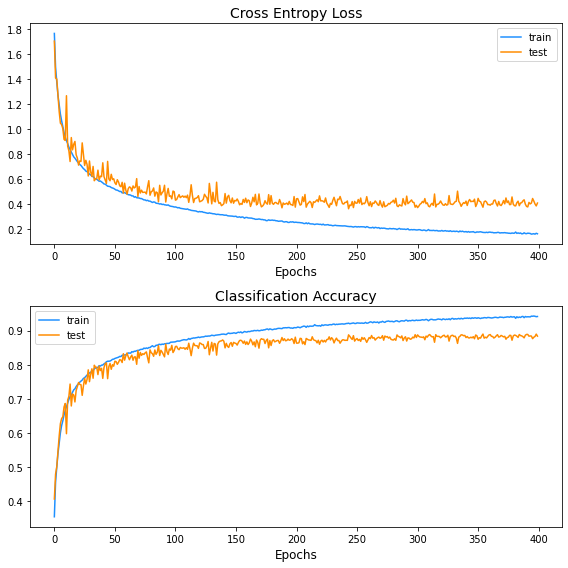

In [ ]:
plot_history(model_name, hist)

In [ ]:
! pwd

/content/gdrive/My Drive/bcj_projects/cifar-vgg


In [ ]:
hist.to_csv(f'./model/{model_name}.csv', index=False)

In [ ]:
model.save(f'./model/{model_name}.h5')